A partir del fichero del Titanic, realizar los siguiente:


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
titanic = 'Titanic.csv'

df = pd.read_csv(titanic)
#print(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. Realice un resumen estadístico de su base de datos. Incluya medidas
de tendencia central (media, mediana, moda) medidas de dispersión (rango, desviación estándar, varianza, cuartiles) y al menos dos gráficos
que representen los datos hallados.

In [7]:
#Resumen estadístico
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


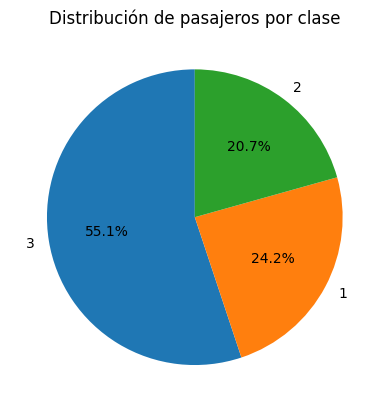

In [27]:
# Gráfico de torta para las clases en el barco
df['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de pasajeros por clase')
plt.ylabel('')  # Elimina la etiqueta del eje y
plt.show()

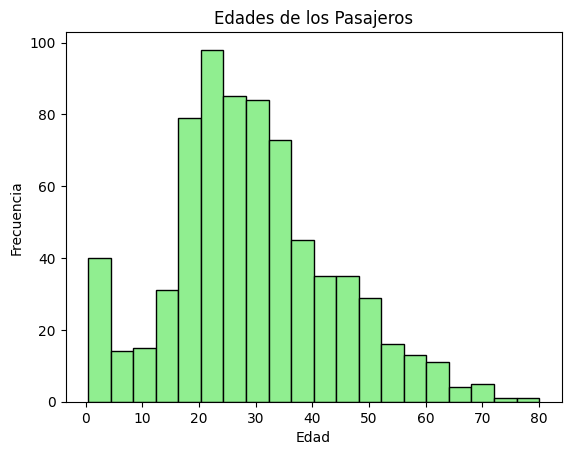

In [24]:
# Histograma de la edad de los pasajeros
plt.hist(df['Age'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

2. Confeccione un gráfico de barras para visualizar hombres y mujeres
que han sobrevivido (Agregue una tabla de contingencia porcentual).


In [20]:
survivors = df.groupby('Sex')['Survived'].sum()#cantidad de sobrevivientes en nro
display(survivors)

tabla_contingencia_porcentual = pd.crosstab(df['Sex'], df['Survived'], normalize='all')
display(tabla_contingencia_porcentual)

Sex
female    233
male      109
Name: Survived, dtype: int64

Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


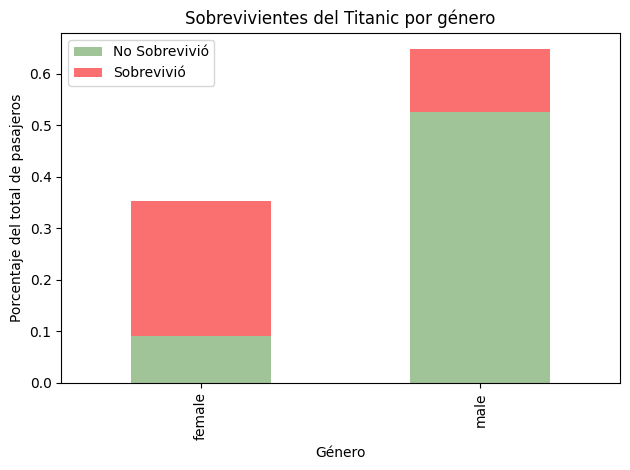

In [23]:
tabla_contingencia_porcentual.plot(kind='bar', stacked=True, color=['#A1C398', '#FA7070'])
plt.title('Sobrevivientes del Titanic por género')
plt.xlabel('Género')
plt.ylabel('Porcentaje del total de pasajeros')

# Mostrar leyenda
plt.legend(['No Sobrevivió', 'Sobrevivió'], loc='upper left')

# Mostrar el gráfico de barras
plt.tight_layout()
plt.show()


3. Realice un gráfico adecuado para mostrar la edad de los pasajeros a
bordo, realice el mismo gráfico pero para cada género, compárelos y
entregue una conclusión respecto al conjunto completo y separado por
géneros. Sea ordenado creado los gráficos

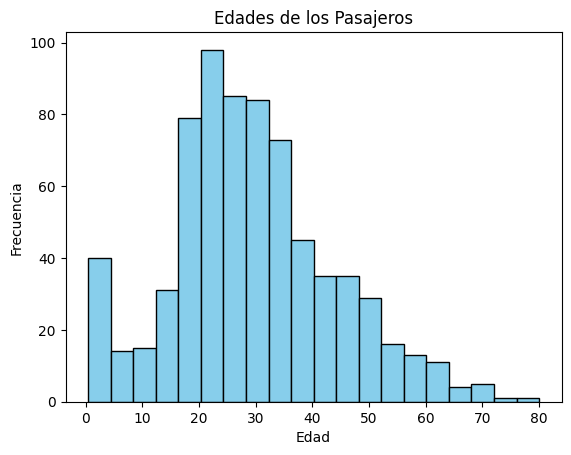

In [34]:
# Histograma de la edad de los pasajeros
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

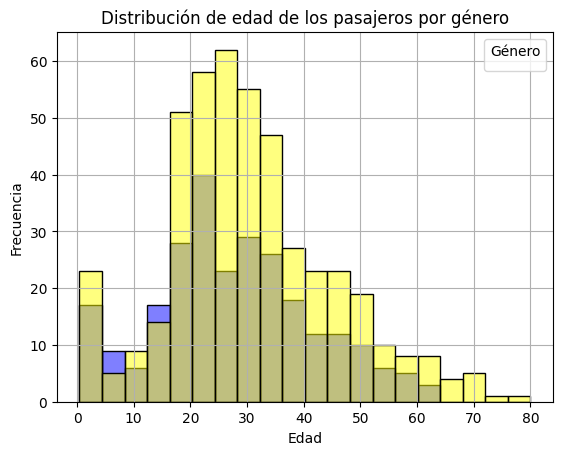

In [42]:
sns.histplot(data=df, x='Age', hue='Sex', bins=20, palette={'male': 'yellow', 'female': 'blue'}, edgecolor='black')
plt.title('Distribución de edad de los pasajeros por género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.grid(True)
plt.show()

En general los gráficos muestran que hay una tendencia a edades más jóvenes dentro del Titanic, mostrando mayores cantidades en el rango de 20 a 30 años. Los hombres presentan edades más variadas, además solo el género masculino supera los 70 años, del mismo modo las mujeres presentan edades infantiles por sobre los hombres.

4. Agregue un análisis extra luego de elaborar un Boxplot que incluya las
variables del género y edad de los pasajeros.

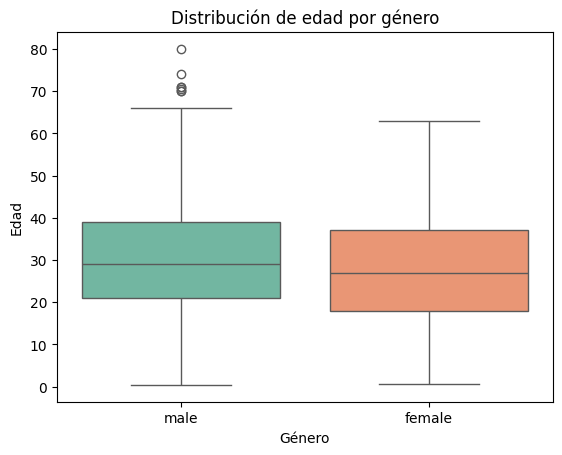

In [45]:
sns.boxplot(data=df, x='Sex', y='Age', hue='Sex', palette='Set2', dodge=False)
plt.title('Distribución de edad por género')
plt.xlabel('Género')
plt.ylabel('Edad')
#plt.legend(title=None)
plt.show()

Tanto en hombres como en mujeres, las edades presentan una distribución centrada, indicando una leve tendencia a que las mujeres eran más jóvenes que los hombres.
La presencia de estos outliers puede afectar el análisis, ya que pueden distorsionar las estimaciones estadísticas y las interpretaciones. La eliminación de estos outliers permitirá una evaluación más precisa con respecto a las edades del género masculino.
